In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!ls log_files

'fitness_&_operator_probs_17_15_log.csv'   operator_probs_13_45_log.csv
'fitness_&_operator_probs_17_27_log.csv'   operator_probs_13_49_log.csv
'fitness_&_operator_probs_17_41_log.csv'   operator_probs_13_50_log.csv
'fitness_&_operator_probs_17_43_log.csv'   operator_probs_13_51_log.csv
'fitness_&_operator_probs_17_44_log.csv'   operator_probs_13_52_log.csv
'fitness_&_operator_probs_17_46_log.csv'   operator_probs_13_53_log.csv
'fitness_&_operator_probs_17_47_log.csv'   operator_probs_13_54_log.csv
'fitness_&_operator_probs_17_48_log.csv'   results_13_43_log.csv
'fitness_&_operator_probs_17_49_log.csv'   results_13_45_log.csv
'fitness_&_operator_probs_17_50_log.csv'   results_13_49_log.csv
'fitness_&_operator_probs_17_51_log.csv'   results_13_50_log.csv
'fitness_&_operator_probs_17_52_log.csv'   results_13_54_log.csv
'fitness_&_operator_probs_17_53_log.csv'   results_17_15_log.csv
'fitness_&_operator_probs_17_54_log.csv'   results_17_17_log.csv
'fitness_&_operator_probs_17_55_log.csv' 

In [6]:
df = pd.read_csv('log_files/results_17_41_log.csv') 
df.head()

,Seed,Algorithm,time,mean_s_error,explained_variance,final_tree_size
0,0,GS_GP_edv15,0:01:16.214822,2.035486,-1.259789,NaN
1,0,GS_GP_neighbors5,0:01:48.333796,1.930140,-1.506977,NaN
2,0,GS_GP_edv25,0:01:20.702541,2.035486,-1.259789,NaN
3,0,GS_GP_edv35,0:00:08.849223,2.539495,-0.652596,NaN
4,0,GS_GP_edv45,0:00:08.572249,2.539495,-0.652596,NaN


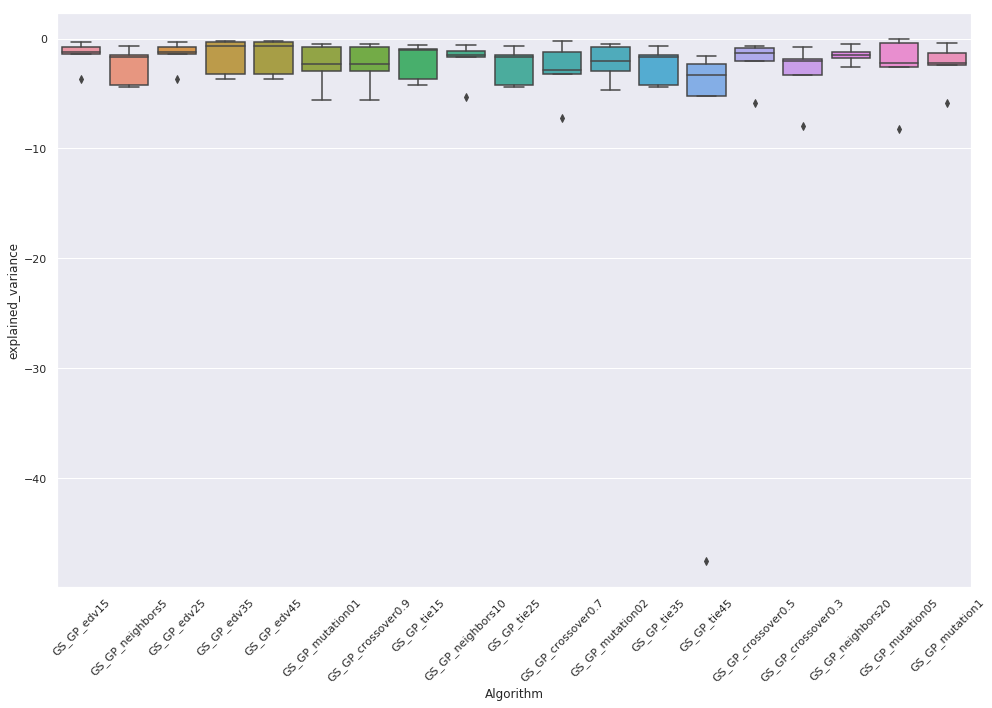

In [9]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='explained_variance',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

#plt.savefig('plots/algorithms_precision_recall_boxplots.png')

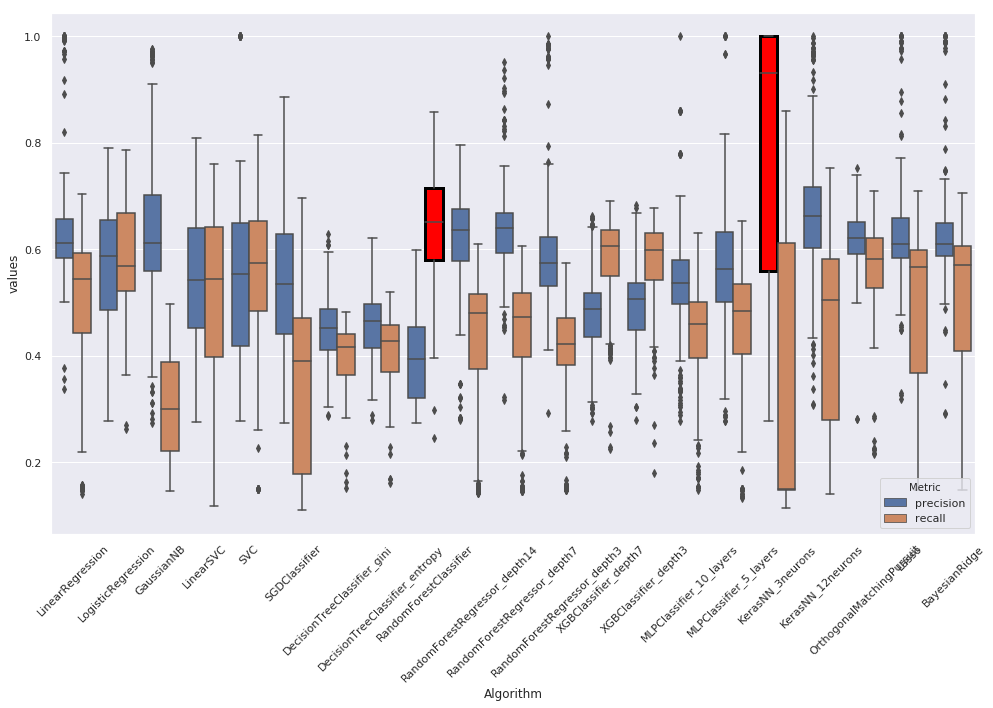

In [7]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='values',data=data_to_plot,hue='Metric')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


for box_highlighted in [17,32]:
    # Select which box you want to change    
    mybox = ax.artists[box_highlighted]

    # Change the appearance of that box
    mybox.set_facecolor('red')
    mybox.set_edgecolor('black')
    mybox.set_linewidth(3)

plt.tight_layout()

plt.savefig('plots/algorithms_precision_recall_boxplots_highlighted.png')

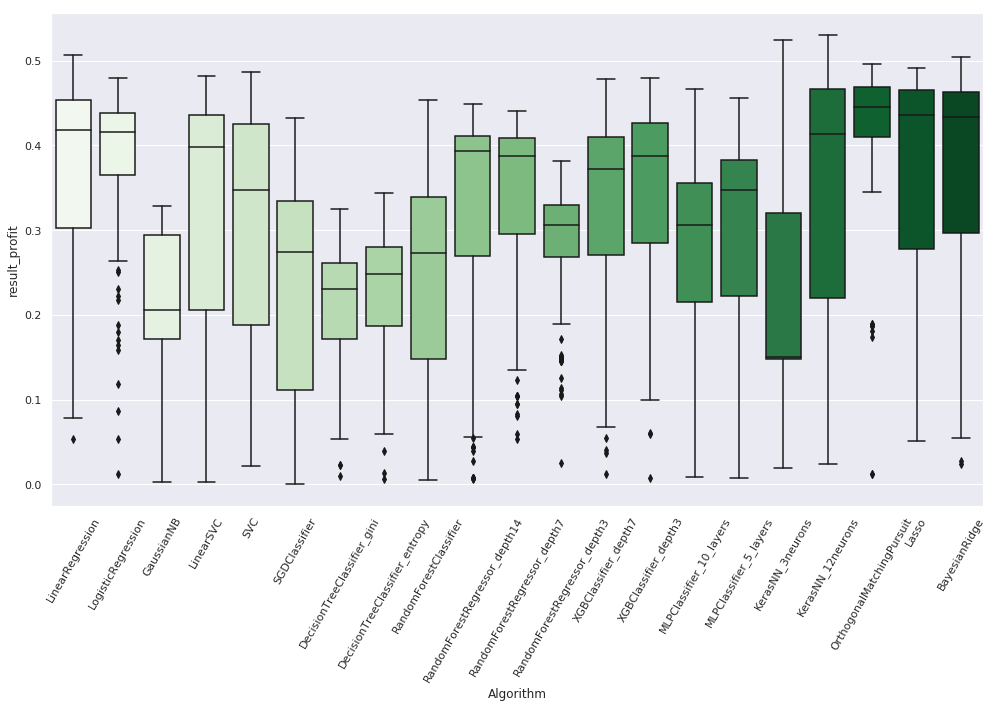

In [8]:
ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.tight_layout()

plt.savefig('plots/algorithms_profit_share_boxplots_unranked.png')

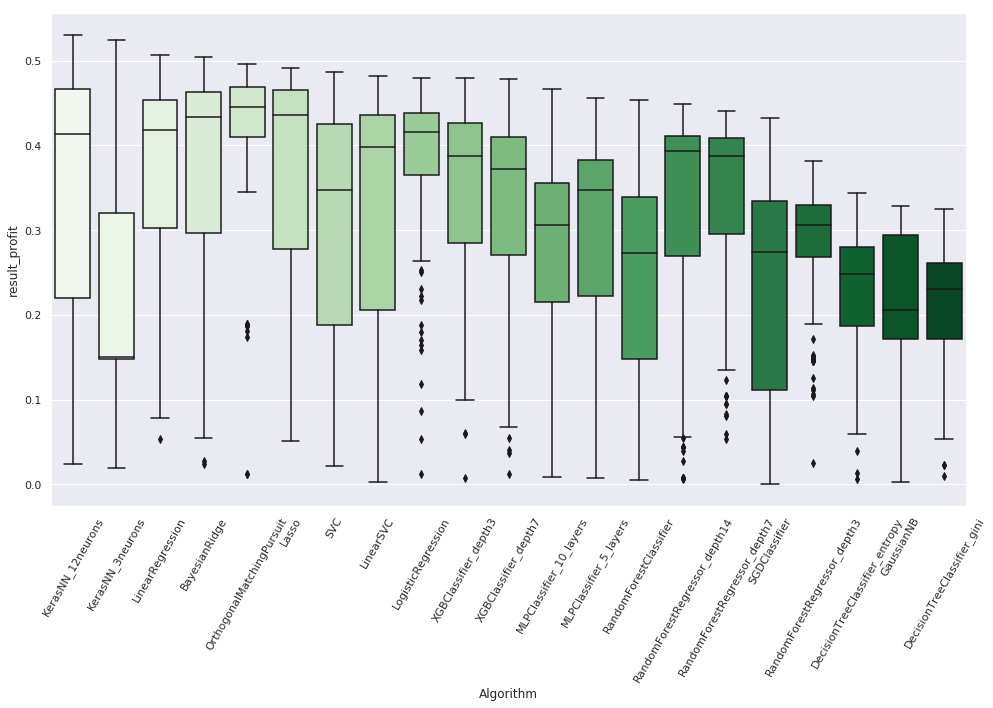

In [9]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].max().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.tight_layout()

plt.savefig('plots/algorithms_profit_share_boxplots_maxrank.png')

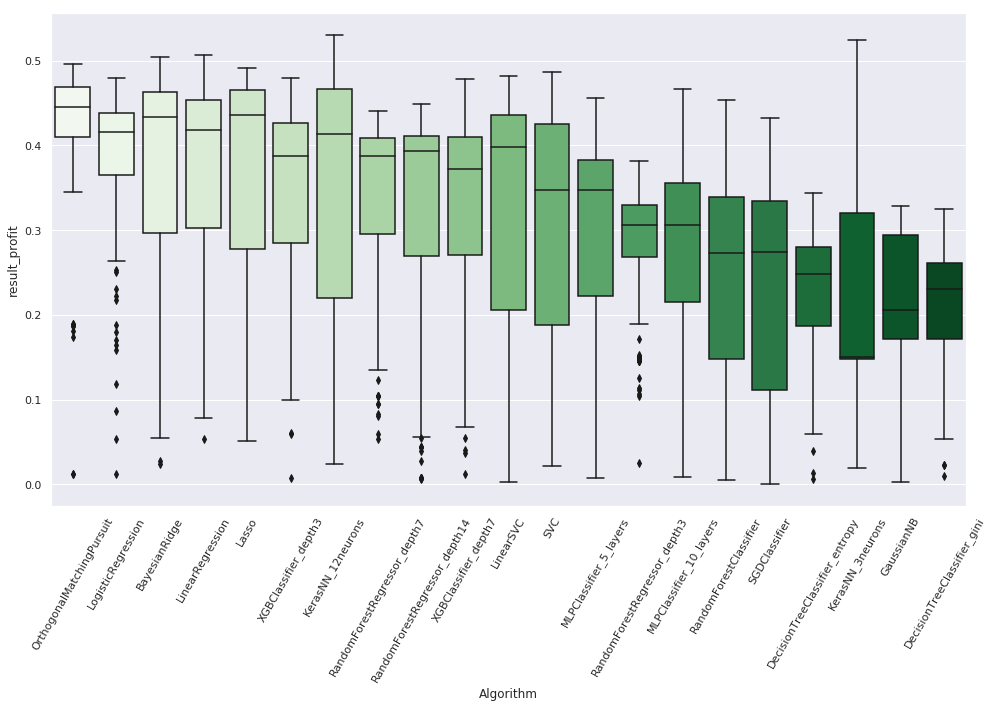

In [10]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.tight_layout()

plt.savefig('plots/algorithms_profit_share_boxplots_meanrank.png')

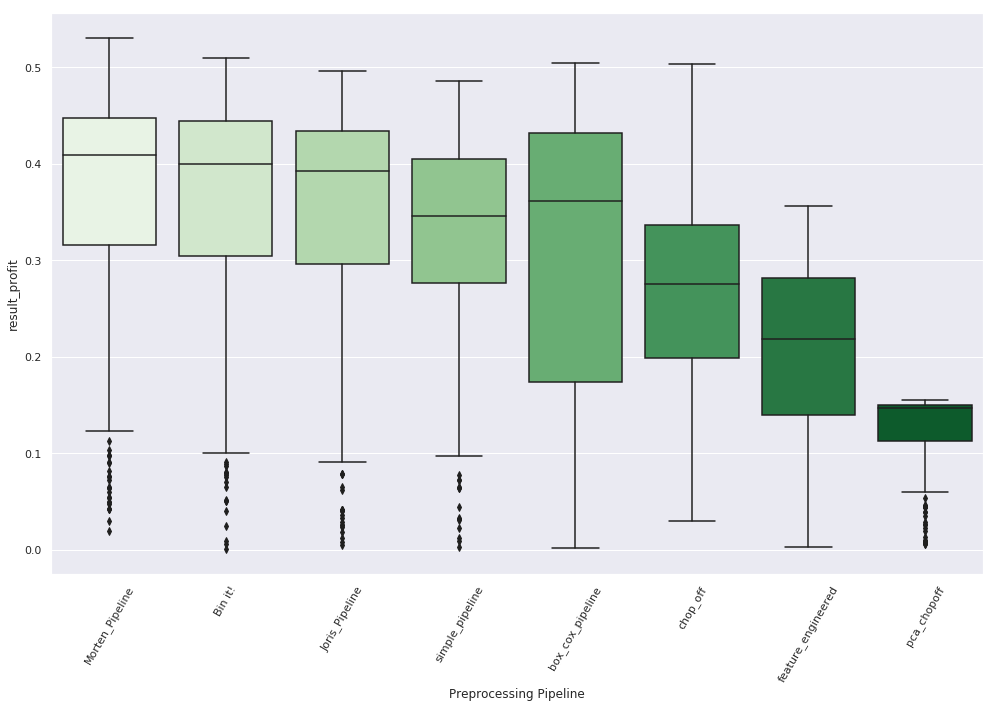

In [11]:
ranks = df[df.result_profit > 0].groupby("Preprocessing Pipeline")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Preprocessing Pipeline', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.tight_layout()

plt.savefig('plots/pipeline_profit_share_boxplots_meanrank.png')

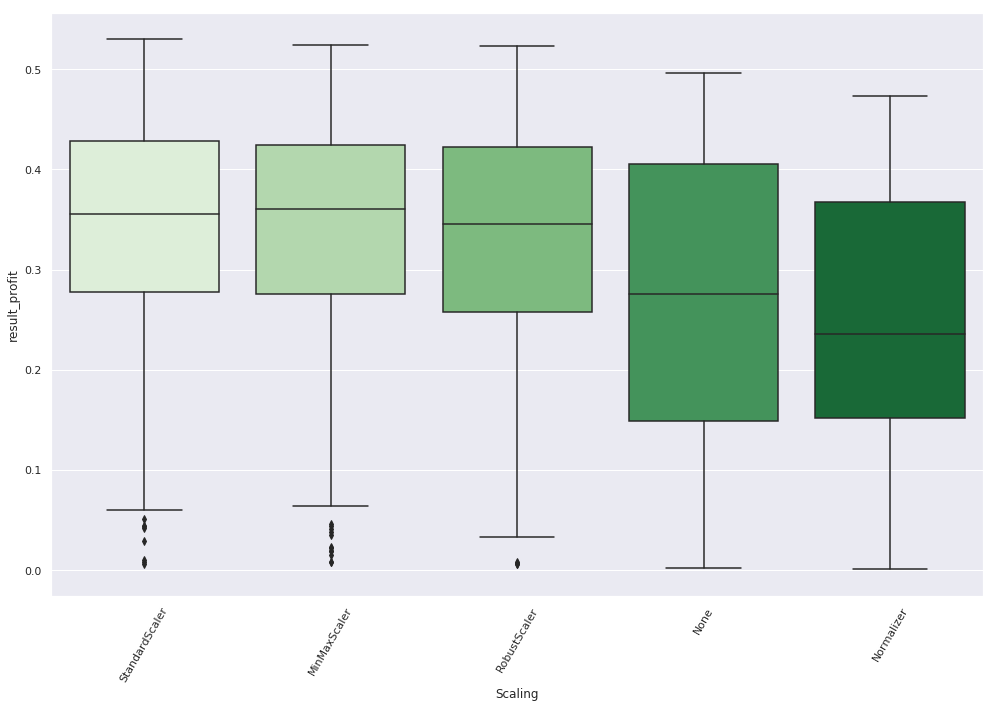

In [12]:
ranks = df[df.result_profit > 0].groupby("Scaling")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Scaling', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.tight_layout()

plt.savefig('plots/scaling_profit_share_boxplots_meanrank.png')

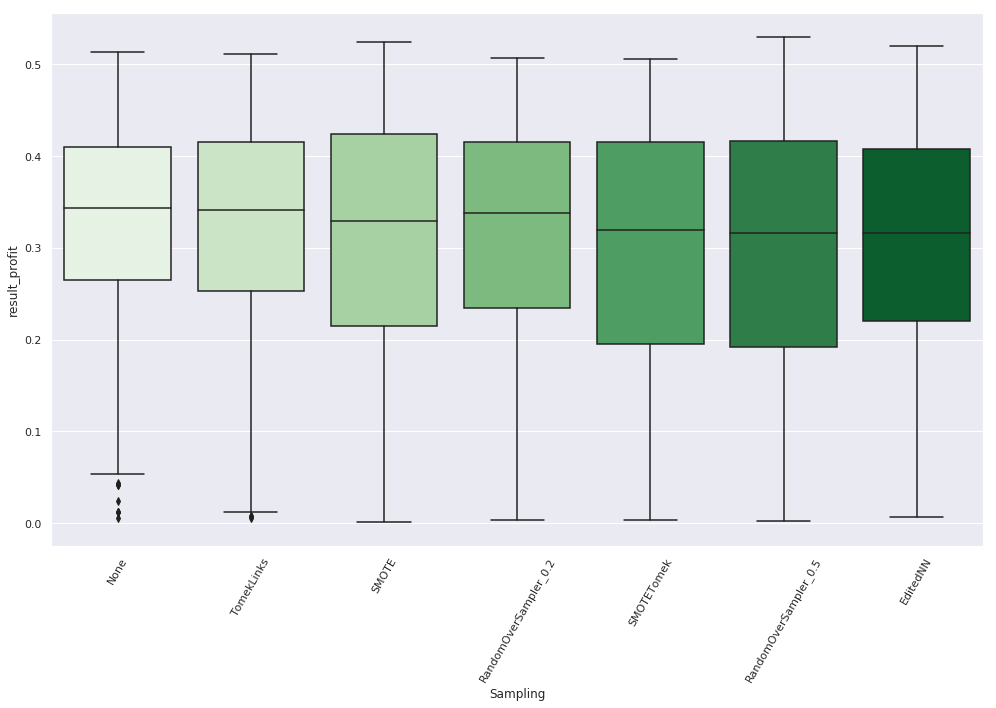

In [13]:
ranks = df[df.result_profit > 0].groupby("Sampling")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Sampling', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.tight_layout()

plt.savefig('plots/sampling_profit_share_boxplots_meanrank.png')

## Scatterplots


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


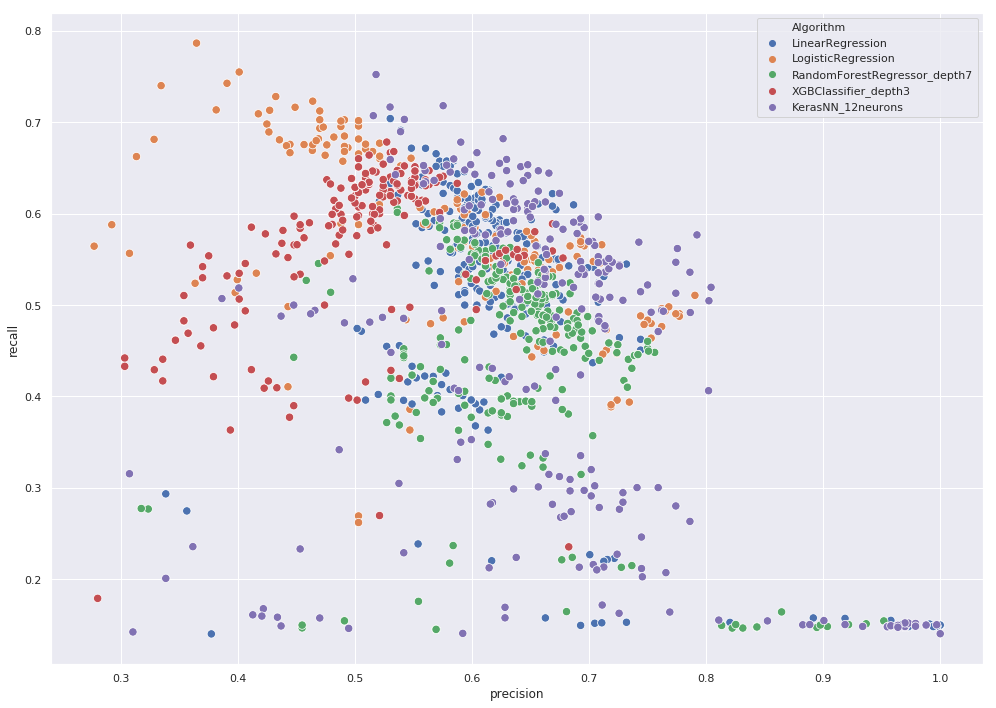

In [14]:
highest_scores = df[df.result_profit > 0][df.Algorithm.isin(["LogisticRegression","LinearRegression","KerasNN_12neurons", "XGBClassifier_depth3","RandomForestRegressor_depth7"])]
sns.scatterplot(x='precision', y='recall', hue='Algorithm', data=highest_scores,s=70)
plt.tight_layout()

plt.savefig('plots/main_algorithms_precision_recall_scatterplot.png')

## Violinplot

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


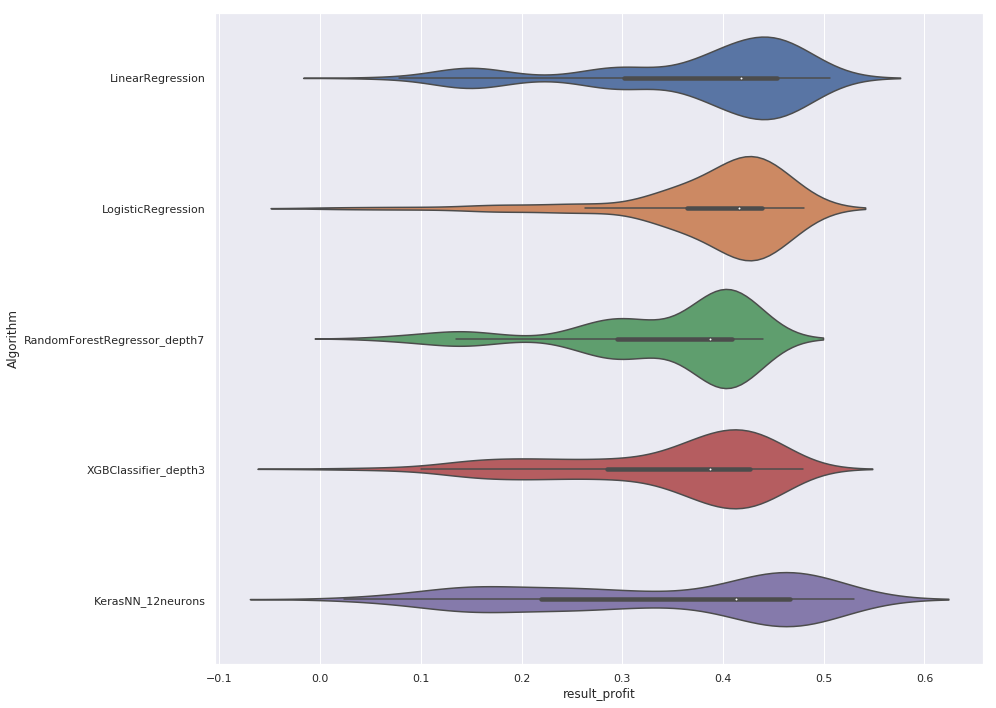

In [15]:
highest_scores = df[df.result_profit > 0][df.Algorithm.isin(["LogisticRegression","LinearRegression","KerasNN_12neurons", "XGBClassifier_depth3","RandomForestRegressor_depth7"])]
sns.violinplot(x='result_profit', y='Algorithm', data=highest_scores)
plt.tight_layout()

plt.savefig('plots/main_algorithms_profit_share_violinplot.png')

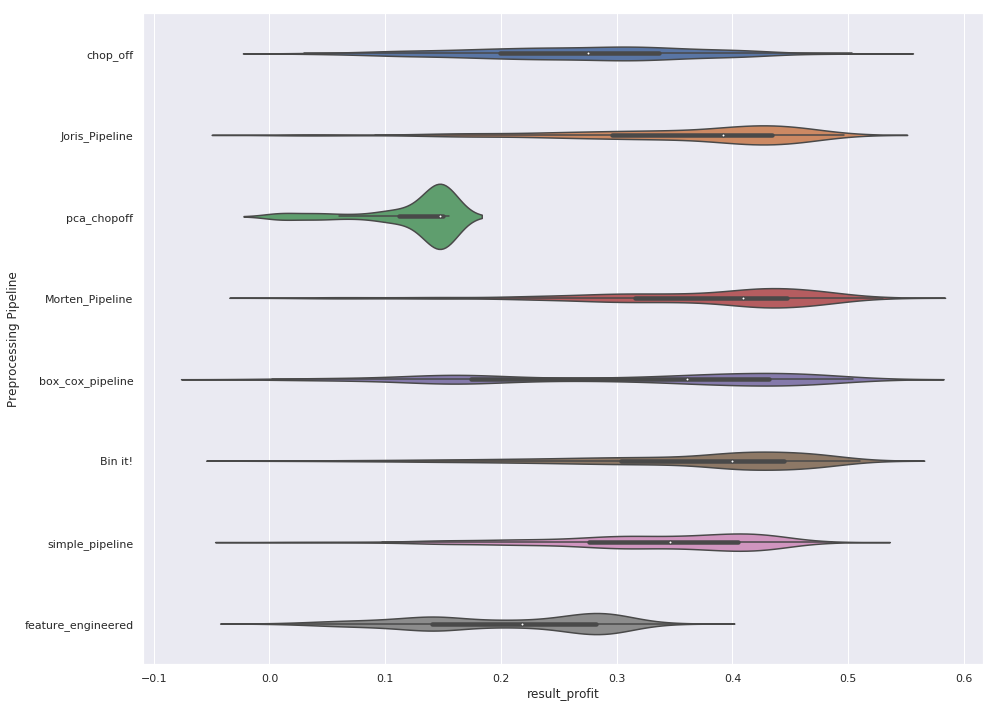

In [16]:
sns.violinplot(x='result_profit', y='Preprocessing Pipeline', data= df[df.result_profit > 0])
plt.tight_layout()

plt.savefig('plots/pipelines_profit_share_violinplot.png')